<a href="https://colab.research.google.com/github/Greta-gerasimov/ALG_2/blob/Lesson_6_GBoosting%2FSGB/hw6_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

from sklearn.ensemble import GradientBoostingClassifier

from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
import statistics

In [198]:
# X, y = load_breast_cancer(return_X_y=True)
df = pd.DataFrame(load_breast_cancer()['data'],
columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [199]:

X,y = df.drop('y',axis=1),df.y
kf = KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,test_index in kf.split(X):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index],
    y_train,y_test = y.iloc[train_index],y.iloc[test_index],

In [200]:
def get_error(pred, y):
    return sum(pred != y) / len(y)

#10 max_depth = 1

In [229]:
def adaboost(X, y, N):
    n_objects = len(X)
    n_classes = len(np.unique((y)))
    w = np.ones(n_objects) / n_objects
    models = []

    for n in range(N):
        clf = DecisionTreeClassifier(max_depth=1)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
        if e >= 1 - 1/n_classes: 
            break
        alpha = 0.5 * np.log((1 - e) / e)
        match = predictions == y
        w[~match] *= np.exp(alpha)
        w /= w.sum()
        models.append((alpha, clf))
    
    return models

N = 10

models = adaboost(X_train, y_train, N)
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
  
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
     
        y_pred[range(n_objects), prediction] += alpha
    

    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred
print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

train_errors = []
test_errors_10_1 = []


for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors_10_1.append(get_error(predict(X_test, mods), y_test))
mean_test_errors_10_1 = statistics.mean(test_errors_10_1)
print(mean_test_errors_10_1)

Точность алгоритма на обучающей выборке: 96.930
Точность алгоритма на тестовой выборке: 93.805
0.09262536873156342


#10, max_depth =2

In [235]:
def adaboost(X, y, N):
    n_objects = len(X)
    n_classes = len(np.unique((y)))
    w = np.ones(n_objects) / n_objects
    models = []

    for n in range(N):
        clf = DecisionTreeClassifier(max_depth=2)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
        if e >= 1 - 1/n_classes: 
            break
        alpha = 0.5 * np.log((1 - e) / e)
        match = predictions == y
        w[~match] *= np.exp(alpha)
        w /= w.sum()
        models.append((alpha, clf))
    
    return models

N = 10

models = adaboost(X_train, y_train, N)
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
  
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
     
        y_pred[range(n_objects), prediction] += alpha
    

    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

train_errors = []
test_errors_10_2 = []


for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors_10_2.append(get_error(predict(X_test, mods), y_test))
mean_test_errors_10_2 = statistics.mean(test_errors_10_2)
print(mean_test_errors_10_2)

Точность алгоритма на обучающей выборке: 99.561
Точность алгоритма на тестовой выборке: 94.690
0.06342182890855458


#10, max_depth = 3

In [202]:
def adaboost(X, y, N):
    n_objects = len(X)
    n_classes = len(np.unique((y)))
    w = np.ones(n_objects) / n_objects
    models = []

    for n in range(N):
        clf = DecisionTreeClassifier(max_depth=3)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
        if e >= 1 - 1/n_classes: 
            break
        alpha = 0.5 * np.log((1 - e) / e)
        match = predictions == y
        w[~match] *= np.exp(alpha)
        w /= w.sum()
        models.append((alpha, clf))
    
    return models

N = 10

models = adaboost(X_train, y_train, N)
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
  
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
     
        y_pred[range(n_objects), prediction] += alpha
    

    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

train_errors = []
test_errors_10_3 = []


for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors_10_3.append(get_error(predict(X_test, mods), y_test))
mean_test_errors_10_3 = statistics.mean(test_errors_10_3)
print(mean_test_errors_10_3)

Точность алгоритма на обучающей выборке: 100.000
Точность алгоритма на тестовой выборке: 95.575
0.04542772861356932


#30, max_depth = 1

In [263]:
def adaboost(X, y, N):
    n_objects = len(X)
    n_classes = len(np.unique((y)))
    w = np.ones(n_objects) / n_objects
    models = []

    for n in range(N):
        clf = DecisionTreeClassifier(max_depth=1)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
        if e >= 1 - 1/n_classes: 
            break
        alpha = 0.5 * np.log((1 - e) / e)
        match = predictions == y
        w[~match] *= np.exp(alpha)
        w /= w.sum()
        models.append((alpha, clf))
    
    return models

N = 30

models = adaboost(X_train, y_train, N)
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
  
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
     
        y_pred[range(n_objects), prediction] += alpha
    

    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

train_errors = []
test_errors_30_1 = []


for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors_30_1.append(get_error(predict(X_test, mods), y_test))
mean_test_errors_30_1 = statistics.mean(test_errors_30_1)
print(mean_test_errors_30_1)

Точность алгоритма на обучающей выборке: 97.807
Точность алгоритма на тестовой выборке: 92.035
0.09262536873156342


#30, max_depth = 2

In [264]:
def adaboost(X, y, N):
    n_objects = len(X)
    n_classes = len(np.unique((y)))
    w = np.ones(n_objects) / n_objects
    models = []

    for n in range(N):
        clf = DecisionTreeClassifier(max_depth=2)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
        if e >= 1 - 1/n_classes: 
            break
        alpha = 0.5 * np.log((1 - e) / e)
        match = predictions == y
        w[~match] *= np.exp(alpha)
        w /= w.sum()
        models.append((alpha, clf))
    
    return models

N = 30

models = adaboost(X_train, y_train, N)
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
  
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
     
        y_pred[range(n_objects), prediction] += alpha
    

    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

train_errors = []
test_errors_30_2 = []


for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors_30_2.append(get_error(predict(X_test, mods), y_test))
mean_test_errors_30_2 = statistics.mean(test_errors_30_2)
print(mean_test_errors_30_2)

Точность алгоритма на обучающей выборке: 100.000
Точность алгоритма на тестовой выборке: 93.805
0.06342182890855458


#30, max_depth=3

In [266]:
def adaboost(X, y, N):
    n_objects = len(X)
    n_classes = len(np.unique((y)))
    w = np.ones(n_objects) / n_objects
    models = []

    for n in range(N):
        clf = DecisionTreeClassifier(max_depth=3)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
        if e >= 1 - 1/n_classes: 
            break
        alpha = 0.5 * np.log((1 - e) / e)
        match = predictions == y
        w[~match] *= np.exp(alpha)
        w /= w.sum()
        models.append((alpha, clf))
    
    return models

N = 30

models = adaboost(X_train, y_train, N)
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
  
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
     
        y_pred[range(n_objects), prediction] += alpha
    

    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

train_errors = []
test_errors_30_3 = []


for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors_30_3.append(get_error(predict(X_test, mods), y_test))
mean_test_errors_30_3 = statistics.mean(test_errors_30_3)
print(mean_test_errors_30_3)

Точность алгоритма на обучающей выборке: 100.000
Точность алгоритма на тестовой выборке: 95.575
0.04454277286135693


#50, max_depth = 1

In [204]:
def adaboost(X, y, N):
    n_objects = len(X)
    n_classes = len(np.unique((y)))
    w = np.ones(n_objects) / n_objects
    models = []

    for n in range(N):
        clf = DecisionTreeClassifier(max_depth=1)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
        if e >= 1 - 1/n_classes: 
            break
        alpha = 0.5 * np.log((1 - e) / e)
        match = predictions == y
        w[~match] *= np.exp(alpha)
        w /= w.sum()
        models.append((alpha, clf))
    
    return models

N = 50

models = adaboost(X_train, y_train, N)
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
  
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
     
        y_pred[range(n_objects), prediction] += alpha
    

    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

train_errors = []
test_errors_50_1 = []


for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors_50_1.append(get_error(predict(X_test, mods), y_test))
mean_test_errors_50_1 = statistics.mean(test_errors_50_1)
print(mean_test_errors_50_1)

Точность алгоритма на обучающей выборке: 97.807
Точность алгоритма на тестовой выборке: 92.035
0.09262536873156342


#50,max_depth = 2

In [236]:
def adaboost(X, y, N):
    n_objects = len(X)
    n_classes = len(np.unique((y)))
    w = np.ones(n_objects) / n_objects
    models = []

    for n in range(N):
        # Зададим дерево и обучим его
        clf = DecisionTreeClassifier(max_depth=2)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
 
        if e >= 1 - 1/n_classes: 
            break

 
        alpha = 0.5 * np.log((1 - e) / e)

   
        match = predictions == y

    
        w[~match] *= np.exp(alpha)

        w /= w.sum()

    
        models.append((alpha, clf))
    
    return models

N = 50

models = adaboost(X_train, y_train, N)
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
  
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
        y_pred[range(n_objects), prediction] += alpha
    

    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

train_errors = []
test_errors_50_2 = []


for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors_50_2.append(get_error(predict(X_test, mods), y_test))
mean_test_errors_50_2 = statistics.mean(test_errors_50_2)
print(mean_test_errors_50_2)

Точность алгоритма на обучающей выборке: 100.000
Точность алгоритма на тестовой выборке: 94.690
0.06342182890855458


#50, max_depth = 3

In [205]:
def adaboost(X, y, N):
    n_objects = len(X)
    n_classes = len(np.unique((y)))
    w = np.ones(n_objects) / n_objects
    models = []

    for n in range(N):
        clf = DecisionTreeClassifier(max_depth=3)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
        if e >= 1 - 1/n_classes: 
            break
        alpha = 0.5 * np.log((1 - e) / e)
        match = predictions == y
        w[~match] *= np.exp(alpha)
        w /= w.sum()
        models.append((alpha, clf))
    
    return models

N = 50

models = adaboost(X_train, y_train, N)
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
  
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
     
        y_pred[range(n_objects), prediction] += alpha
    

    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred
print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

train_errors = []
test_errors_50_3 = []


for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors_50_3.append(get_error(predict(X_test, mods), y_test))
mean_test_errors_50_3 = statistics.mean(test_errors_50_3)
print(mean_test_errors_50_3)

Точность алгоритма на обучающей выборке: 100.000
Точность алгоритма на тестовой выборке: 95.575
0.04454277286135693


#100, max_depth = 1


In [206]:
def adaboost(X, y, N):
    n_objects = len(X)
    n_classes = len(np.unique((y)))
    w = np.ones(n_objects) / n_objects
    models = []

    for n in range(N):
        clf = DecisionTreeClassifier(max_depth=1)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
        if e >= 1 - 1/n_classes: 
            break
        alpha = 0.5 * np.log((1 - e) / e)
        match = predictions == y
        w[~match] *= np.exp(alpha)
        w /= w.sum()
        models.append((alpha, clf))
    
    return models

N = 100

models = adaboost(X_train, y_train, N)
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
  
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
     
        y_pred[range(n_objects), prediction] += alpha
    

    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

train_errors = []
test_errors_100_1 = []


for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors_100_1.append(get_error(predict(X_test, mods), y_test))
mean_test_errors_100_1 = statistics.mean(test_errors_100_1)
print(mean_test_errors_100_1)

Точность алгоритма на обучающей выборке: 97.807
Точность алгоритма на тестовой выборке: 92.035
0.09262536873156342


#100, max_depth =2


In [237]:
def adaboost(X, y, N):
    n_objects = len(X)
    n_classes = len(np.unique((y)))
    w = np.ones(n_objects) / n_objects
    models = []

    for n in range(N):
        clf = DecisionTreeClassifier(max_depth=2)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
        if e >= 1 - 1/n_classes: 
            break
        alpha = 0.5 * np.log((1 - e) / e)
        match = predictions == y
        w[~match] *= np.exp(alpha)
        w /= w.sum()
        models.append((alpha, clf))
    
    return models

N = 100

models = adaboost(X_train, y_train, N)
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
  
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
     
        y_pred[range(n_objects), prediction] += alpha
    

    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

train_errors = []
test_errors_100_2 = []


for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors_100_2.append(get_error(predict(X_test, mods), y_test))
mean_test_errors_100_2 = statistics.mean(test_errors_100_2)
print(mean_test_errors_100_2)

Точность алгоритма на обучающей выборке: 100.000
Точность алгоритма на тестовой выборке: 95.575
0.06342182890855458


#100, max_depth = 3

In [207]:
def adaboost(X, y, N):
    n_objects = len(X)
    n_classes = len(np.unique((y)))
    w = np.ones(n_objects) / n_objects
    models = []

    for n in range(N):
        clf = DecisionTreeClassifier(max_depth=3)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
        if e >= 1 - 1/n_classes: 
            break
        alpha = 0.5 * np.log((1 - e) / e)
        match = predictions == y
        w[~match] *= np.exp(alpha)
        w /= w.sum()
        models.append((alpha, clf))
    
    return models

N = 100

models = adaboost(X_train, y_train, N)
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
  
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
     
        y_pred[range(n_objects), prediction] += alpha
    

    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

train_errors = []
test_errors_100_3 = []


for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors_100_3.append(get_error(predict(X_test, mods), y_test))
mean_test_errors_100_3 = statistics.mean(test_errors_100_3)

print(mean_test_errors_100_3)

Точность алгоритма на обучающей выборке: 100.000
Точность алгоритма на тестовой выборке: 95.575
0.04365781710914454


In [270]:
d = {"10": [(round(mean_test_errors_10_1,2)),(round(mean_test_errors_10_2,2)),(round(mean_test_errors_10_3,2))],"30":[(round(mean_test_errors_30_1,2)),(round(mean_test_errors_30_2,2)),(round(mean_test_errors_30_3,2))] , "50": [(round(mean_test_errors_50_1,2)),(round(mean_test_errors_50_2,2)),(round(mean_test_errors_50_3,2))], "100": [(round(mean_test_errors_100_1,2)),(round(mean_test_errors_100_2,2)),(round(mean_test_errors_100_3,2))]}
df = pd.DataFrame(data = d, index= [1,2,3])
df

,10,30,50,100
1,0.06,0.04,0.09,0.09
2,0.06,0.06,0.06,0.06
3,0.05,0.04,0.04,0.04


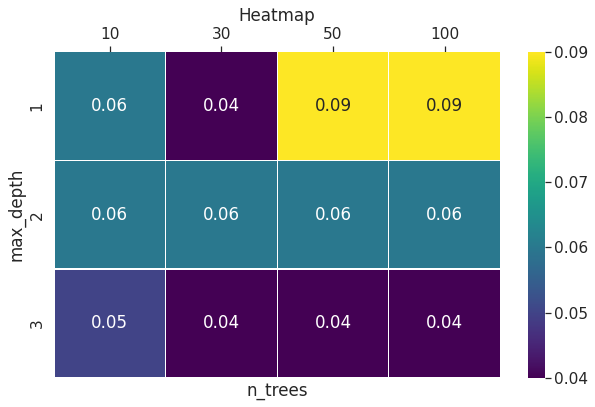

In [273]:
plt.figure(figsize = (10,6))
ax = sns.heatmap(df, annot=True,fmt="g", cmap='viridis',linewidths=.3)
plt.title("Heatmap")
ax.set(xlabel="n_trees", ylabel="max_depth")
ax.xaxis.tick_top()
